In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [2]:

ChuanQi_basic_df = pd.read_excel('20190726广发_信用卡（广东）_清洗后.xlsx',header=0)

In [3]:
ChuanQi_basic_df.head()

,target,MESSAGE,arpu,arpu_avg,called,calling,card_type,gprs,netlong,myth_fee,...,sex,owner_city_level,arpu_derive_1,arpu_avg_derive_1,called_derive_1,calling_derive_1,netlong_derive_1,prdct_fee_avg_derive_1,gprs_derive_1,MESSAGE_derive_1
0,0,8,203.1,203.600001,258,211,0,34.433232,9999,0,...,9999,1,1429.9845,627.5000,312.5,183.0,9999.0000,604.5,88.4035,7.5
1,0,999999,9999.0,9999.000000,9999,9999,0,999999.000000,9,9999,...,9999,1,9999.0000,9999.0000,9999.0,9999.0,4.9995,9999.0,999999.0000,999999.0
2,0,999999,0.0,0.000000,9999,9999,3,999999.000000,6,0,...,9999,1,0.0000,0.0000,9999.0,9999.0,4.9995,0.0,999999.0000,999999.0
3,0,32,124.9,123.166667,157,281,3,16.246631,9999,0,...,1,1,128.2770,125.5915,193.0,308.5,9999.0000,113.0,88.4035,55.5
4,0,999999,9999.0,9999.000000,9999,9999,3,999999.000000,12,9999,...,9999,1,9999.0000,9999.0000,9999.0,9999.0,12.0000,9999.0,999999.0000,999999.0


In [4]:
ChuanQi_basic_df.columns

Index(['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'owner_city', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level', 'arpu_derive_1', 'arpu_avg_derive_1',
       'called_derive_1', 'calling_derive_1', 'netlong_derive_1',
       'prdct_fee_avg_derive_1', 'gprs_derive_1', 'MESSAGE_derive_1'],
      dtype='object')

In [5]:
usefulcolumns=['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
               'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
               'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex','owner_city_level',]
ChuanQi_basic_df=ChuanQi_basic_df[usefulcolumns]

In [6]:
def DealOriginData(ChuanQi_basic_df):
    import copy
    xy_6=copy.deepcopy(ChuanQi_basic_df)
    xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']>600)&(xy_6['prdct_fee_avg']<9999)]=600
    xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']==9999)]=0
    
    xy_6['netlong'][(xy_6['netlong']==9999)]=58

    xy_6['gprs'][(xy_6['gprs']==999999)]=0
    xy_6['gprs'][(xy_6['gprs']>88.4)&(xy_6['gprs']<999999)]=1.5
    xy_6['gprs'][(xy_6['gprs']>12)&(xy_6['gprs']<88.4)]=5.8

    xy_6['calling'][(xy_6['calling']==9999)]=0
    xy_6['called'][(xy_6['called']==9999)]=0


    xy_6['arpu'][(xy_6['arpu']>600)&(xy_6['arpu']<9999)]=600
    xy_6['arpu'][(xy_6['arpu']==9999)]=0

    xy_6['arpu_avg'][(xy_6['arpu_avg']>600)&(xy_6['arpu_avg']<9999)]=600
    xy_6['arpu_avg'][(xy_6['arpu_avg']==9999)]=0

    xy_6['MESSAGE'][(xy_6['MESSAGE']==999999)]=0

    # card_type
    card_typemap={0:0,2:0,4:0,1:1,3:2,8:2}
    xy_6['card_type'].replace(card_typemap,inplace=True)

    # owner_city_level
    citylevelmap={6:0,9:0,8:1,7:1,9999:1,1:2,3:3}
    xy_6['owner_city_level'].replace(citylevelmap,inplace=True)
    return xy_6
Deal_ChuanQi_basic_df=DealOriginData(ChuanQi_basic_df)

In [7]:
display(Deal_ChuanQi_basic_df.head(),Deal_ChuanQi_basic_df.columns)

,target,MESSAGE,arpu,arpu_avg,called,calling,card_type,gprs,netlong,myth_fee,myth_fee_avg,out_prdct_fee,point_fee,prdct_fee_avg,sex,owner_city_level
0,0,8,203.1,203.600001,258,211,0,5.8,58,0,0,0,1,199.0,9999,2
1,0,0,0.0,0.000000,0,0,0,0.0,9,9999,9999,9999,9999,0.0,9999,2
2,0,0,0.0,0.000000,0,0,2,0.0,6,0,0,0,0,0.0,9999,2
3,0,32,124.9,123.166667,157,281,2,5.8,58,0,0,0,1,118.0,1,2
4,0,0,0.0,0.000000,0,0,2,0.0,12,9999,9999,9999,9999,0.0,9999,2


Index(['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level'],
      dtype='object')

In [8]:
X1_data = Deal_ChuanQi_basic_df[[ 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level']]
Y1_data = Deal_ChuanQi_basic_df['target']

from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_data, Y1_data, test_size=0.5, random_state=0)


from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

clf = svm.SVC(C=0.8, kernel='rbf', probability=True)

SVM_Model=clf.fit(X1_train,Y1_train)
predict_results1=SVM_Model.predict(X1_test)
print(accuracy_score(predict_results1, Y1_test))
conf_mat = confusion_matrix(Y1_test, predict_results1)
print(conf_mat)
print(classification_report(Y1_test, predict_results1))


0.8570447718495208
[[29958     0]
 [ 4997     0]]
             precision    recall  f1-score   support

          0       0.86      1.00      0.92     29958
          1       0.00      0.00      0.00      4997

avg / total       0.73      0.86      0.79     34955



In [9]:
X1_train.head()

,MESSAGE,arpu,arpu_avg,called,calling,card_type,gprs,netlong,myth_fee,myth_fee_avg,out_prdct_fee,point_fee,prdct_fee_avg,sex,owner_city_level
23826,0,88.00,88.856667,0,0,2,0.000000,58,0,0,0,1,88.0,1,2
46511,2,58.00,58.000000,11,16,0,0.736514,30,0,0,0,1,8.0,9999,3
49640,2,61.09,45.763334,61,43,0,5.800000,33,0,0,0,1,38.0,1,0
3321,4,93.20,93.333331,143,80,0,6.934453,58,0,0,0,1,93.0,1,0
18729,14,92.08,91.290001,214,270,0,6.209580,58,0,0,0,1,88.0,9999,2


In [10]:
SVM_Model

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

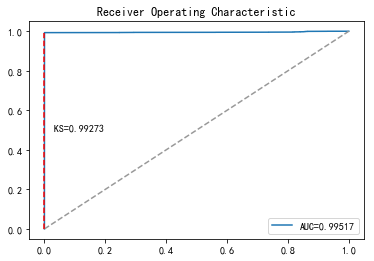

In [11]:
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
import statsmodels.api as sm


y1_predicted = SVM_Model.predict_proba(X1_train)

fpr, tpr, thresholds = roc_curve(Y1_train,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  



In [12]:
display(y1_predicted.sum(),len(y1_predicted))

34955.0

34955

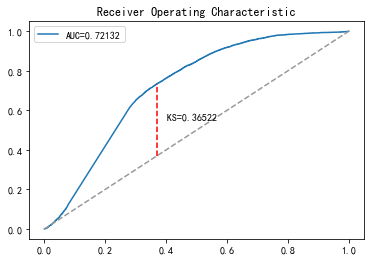

In [15]:
# 用在测试集上：

y1_predicted = SVM_Model.predict_proba(X1_test)

fpr, tpr, thresholds = roc_curve(Y1_test,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

In [ ]:
Y1_test.value_counts()

In [172]:
#使用神经网络来预测模型


import sklearn
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy


model = MLPClassifier(activation='logistic', solver='adam', hidden_layer_sizes=(30, 30),alpha=0.00001,max_iter=90000000000)  # 神经网络
neuralnetwork_model=model.fit(X1_train,Y1_train)


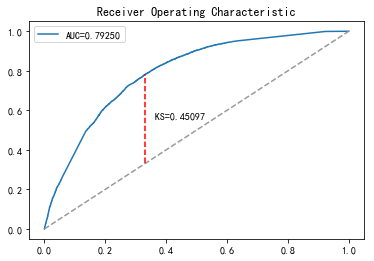

In [173]:

y1_predicted = neuralnetwork_model.predict_proba(X1_test)

fpr, tpr, thresholds = roc_curve(Y1_test,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

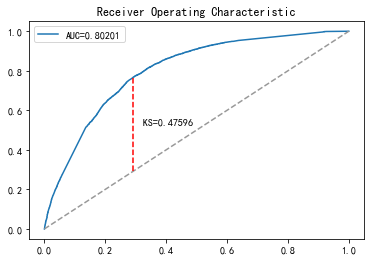

In [174]:
y1_predicted = neuralnetwork_model.predict_proba(X1_train)

fpr, tpr, thresholds = roc_curve(Y1_train,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

In [176]:
len(X1_train.columns)

15

In [199]:
# 随机森林算法：
import math


from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators=500,max_features=math.ceil(math.sqrt(len(X1_train.columns))), max_depth=5,min_samples_split=2, bootstrap=True)

randomforest_model_RFC=model_RFC.fit(X1_train, Y1_train)

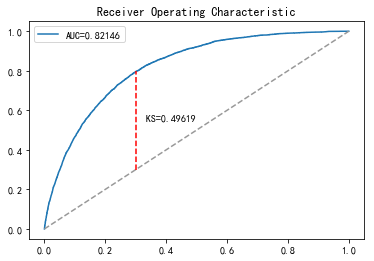

In [200]:
y1_predicted = randomforest_model_RFC.predict_proba(X1_test)

fpr, tpr, thresholds = roc_curve(Y1_test,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

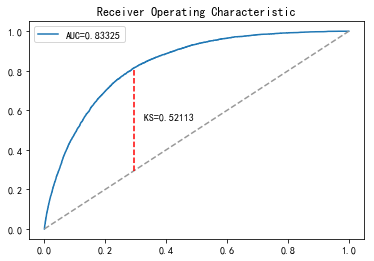

In [201]:
y1_predicted = randomforest_model_RFC.predict_proba(X1_train)

fpr, tpr, thresholds = roc_curve(Y1_train,y1_predicted[:,1], pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

In [77]:
Deal_ChuanQi_basic_df.columns

Index(['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level'],
      dtype='object')

In [11]:
for columns in ['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level']:
    print(columns,len(Deal_ChuanQi_basic_df[columns].value_counts()))

target 2
MESSAGE 101
arpu 13105
arpu_avg 31794
called 1547
calling 1612
card_type 3
gprs 35939
netlong 59
myth_fee 2
myth_fee_avg 2
out_prdct_fee 2
point_fee 3
prdct_fee_avg 2600
sex 3
owner_city_level 4


In [12]:
# 对模型的离散型变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList=['card_type', 'myth_fee',
       'myth_fee_avg', 'out_prdct_fee', 'point_fee', 'sex',
       'owner_city_level',]

for ClassifyColumn in ClassifyColumnsList:
    #print(ClassifyColumn,len(ChuanQi_basic_df[ClassifyColumn].value_counts()))
    Deal_ChuanQi_basic_df[ClassifyColumn]=Deal_ChuanQi_basic_df[ClassifyColumn].astype('str')
ConvertType_ChuanQi_basic_df = Deal_ChuanQi_basic_df[['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling',
       'card_type', 'gprs', 'netlong', 'myth_fee', 'myth_fee_avg',
       'out_prdct_fee', 'point_fee', 'prdct_fee_avg', 'sex',
       'owner_city_level']]
##筛选特定列
display(ConvertType_ChuanQi_basic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69910 entries, 0 to 69909
Data columns (total 16 columns):
target              69910 non-null int64
MESSAGE             69910 non-null int64
arpu                69910 non-null float64
arpu_avg            69910 non-null float64
called              69910 non-null int64
calling             69910 non-null int64
card_type           69910 non-null object
gprs                69910 non-null float64
netlong             69910 non-null int64
myth_fee            69910 non-null object
myth_fee_avg        69910 non-null object
out_prdct_fee       69910 non-null object
point_fee           69910 non-null object
prdct_fee_avg       69910 non-null float64
sex                 69910 non-null object
owner_city_level    69910 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 8.5+ MB


None

In [13]:
OneHot_ChuanQi_basic_df=pd.get_dummies(ConvertType_ChuanQi_basic_df)
OneHot_ChuanQi_basic_df.columns

Index(['target', 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling', 'gprs',
       'netlong', 'prdct_fee_avg', 'card_type_0', 'card_type_1', 'card_type_2',
       'myth_fee_0', 'myth_fee_9999', 'myth_fee_avg_0', 'myth_fee_avg_9999',
       'out_prdct_fee_0', 'out_prdct_fee_9999', 'point_fee_0', 'point_fee_1',
       'point_fee_9999', 'sex_0', 'sex_1', 'sex_9999', 'owner_city_level_0',
       'owner_city_level_1', 'owner_city_level_2', 'owner_city_level_3'],
      dtype='object')

In [14]:
OneHot_ChuanQi_basic_df.head()

,target,MESSAGE,arpu,arpu_avg,called,calling,gprs,netlong,prdct_fee_avg,card_type_0,...,point_fee_0,point_fee_1,point_fee_9999,sex_0,sex_1,sex_9999,owner_city_level_0,owner_city_level_1,owner_city_level_2,owner_city_level_3
0,0,8,203.1,203.600001,258,211,5.8,58,199.0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0.0,0.000000,0,0,0.0,9,0.0,1,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0.0,0.000000,0,0,0.0,6,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,32,124.9,123.166667,157,281,5.8,58,118.0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0.0,0.000000,0,0,0.0,12,0.0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:

X_data = OneHot_ChuanQi_basic_df[[ 'MESSAGE', 'arpu', 'arpu_avg', 'called', 'calling', 'gprs',
       'netlong', 'prdct_fee_avg', 'card_type_0', 'card_type_1', 'card_type_2',
       'myth_fee_0', 'myth_fee_9999', 'myth_fee_avg_0', 'myth_fee_avg_9999',
       'out_prdct_fee_0', 'out_prdct_fee_9999', 'point_fee_0', 'point_fee_1',
       'point_fee_9999', 'sex_0', 'sex_1', 'sex_9999', 'owner_city_level_0',
       'owner_city_level_1', 'owner_city_level_2', 'owner_city_level_3']]
Y_data = OneHot_ChuanQi_basic_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.5, random_state=0)


In [16]:
X_train.shape

(34955, 27)

In [ ]:

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

clf = svm.SVC(C=0.8, kernel='rbf',)

clf.fit(X_train,Y_train)
predict_results=clf.predict(X_test)
print(accuracy_score(predict_results, Y_test))
conf_mat = confusion_matrix(Y_test, predict_results)
print(conf_mat)
print(classification_report(Y_test, predict_results))
